<a href="https://colab.research.google.com/github/aditya161205/Battle-Of-The-Bots/blob/main/week0_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [13]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [14]:
transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

train_dataset=datasets.MNIST(root='./data',transform=transform,train=True,download=True)
test_dataset=datasets.MNIST(root='./data',transform=transform,train=False,download=True)

train_loader=DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=1000)


In [15]:
SequentialNet=nn.Sequential(
    nn.Flatten(),
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10)
    )

In [16]:
def train(model,loader,optimizer,loss_fn,epochs=5):
  model.train()

  for epoch in range (epochs):
    total_loss =0
    for x,y in loader:
      x, y = x.to(device), y.to(device)
      optimizer.zero_grad()
      logits=model(x)
      loss=loss_fn(logits,y)
      loss.backward()
      optimizer.step()
      total_loss+=loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


In [19]:
def test(model,loader):
  model.eval()
  total=0
  correct=0

  with torch.no_grad():
    for x,y in loader:
      x, y = x.to(device), y.to(device)
      logits = model(x)
      pred=logits.argmax(dim=1)

      correct+=(pred==y).sum().item()
      total+= y.size(0)
    print(f"Accuracy: {100 * correct / total:.2f}%")


In [20]:
print("\nTraining SequentialNet")
sequential_model = SequentialNet.to(device)
optimizer_seq = optim.Adam(sequential_model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()


train(sequential_model, train_loader, optimizer_seq, loss_fn)
test(sequential_model, test_loader)


Training SequentialNet
Epoch 1, Loss: 79.5923
Epoch 2, Loss: 71.0981
Epoch 3, Loss: 63.0726
Epoch 4, Loss: 56.2348
Epoch 5, Loss: 52.1932
Accuracy: 97.35%


In [25]:
# Custom model
class ManualNet(nn.Module):
    def __init__(self):
        super(ManualNet, self).__init__()
        self.w1 = nn.Parameter(torch.randn(784, 128) * 0.01)
        self.b1 = nn.Parameter(torch.zeros(128))

        self.w2 = nn.Parameter(torch.randn(128, 64) * 0.01)
        self.b2 = nn.Parameter(torch.zeros(64))

        self.w3 = nn.Parameter(torch.randn(64, 10) * 0.01)
        self.b3 = nn.Parameter(torch.zeros(10))


    def forward(self, x):
        x = x.view(-1, 784)
        x = x @ self.w1 +self.b1
        x = F.relu(x)

        x = x @ self.w2 +self.b2
        x = F.relu(x)

        x = x @ self.w3 +self.b3

        return x

In [37]:
print("\nTraining ManualNet")
# TODO: Create a ManualNet object and call it manual_model. Train and test it

manual_model=ManualNet()

optimizer_seq = optim.Adam(manual_model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()


train(manual_model, train_loader, optimizer_seq, loss_fn)
test(manual_model, test_loader)



Training ManualNet
Epoch 1, Loss: 532.7297
Epoch 2, Loss: 241.8562
Epoch 3, Loss: 170.7888
Epoch 4, Loss: 134.6412
Epoch 5, Loss: 109.5381
Accuracy: 96.25%


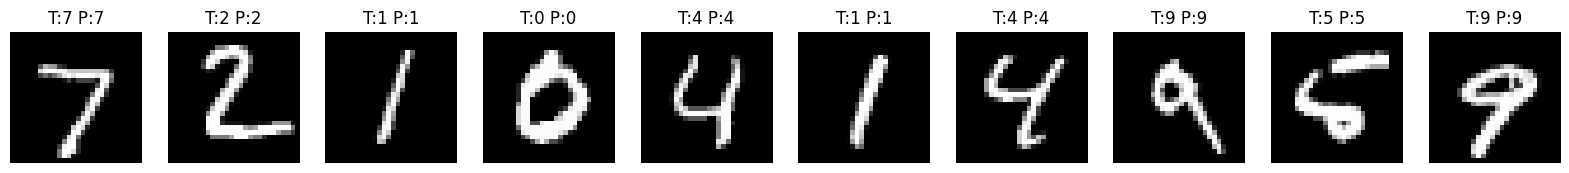

In [38]:
def visualize(model, loader, n=10):
    model.eval()
    x, y = next(iter(loader))
    x, y = x.to(device), y.to(device)
    preds = model(x).argmax(dim=1)

    plt.figure(figsize=(20, 4))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(x[i].cpu().squeeze(), cmap='gray')
        plt.title(f"T:{y[i].item()} P:{preds[i].item()}")
        plt.axis('off')
    plt.show()

# visualize(manual_model, test_loader) # Uncomment this later
visualize(sequential_model, test_loader)